In [3]:
import random 
import cv2
import albumentations as A
from matplotlib import pyplot as plt

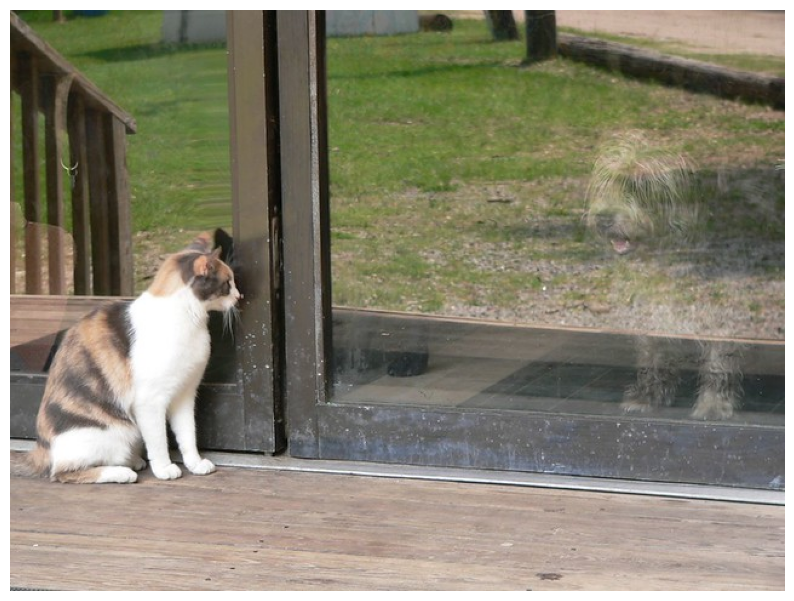

In [6]:
# 시각화 함수 
def visualize(image):
    plt.figure(figsize=(10,10))
    plt.axis('off')
    plt.imshow(image)
    
image = cv2.imread('cat_dog.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
visualize(image)

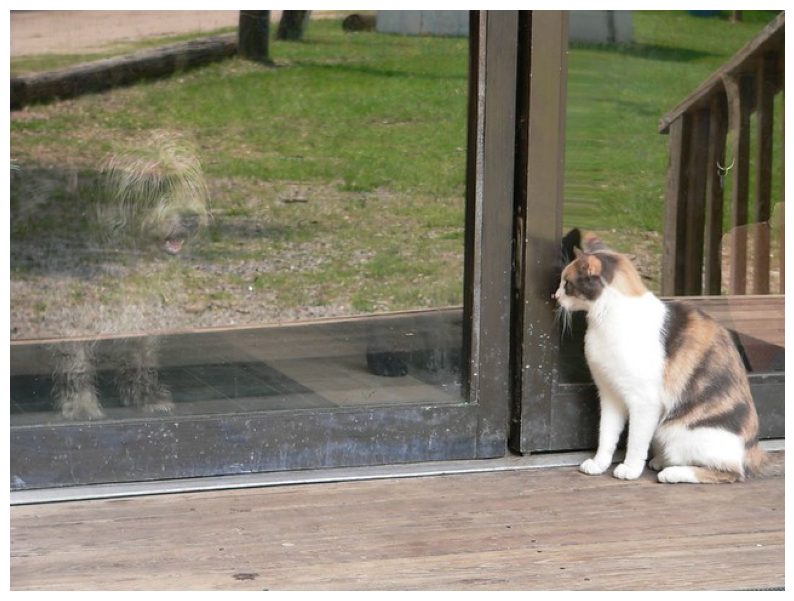

In [10]:
# 좌우 반전
transform = A.HorizontalFlip(p=0.5)
random.seed(7)
augmeneted_image = transform(image=image)['image']
visualize(augmeneted_image)

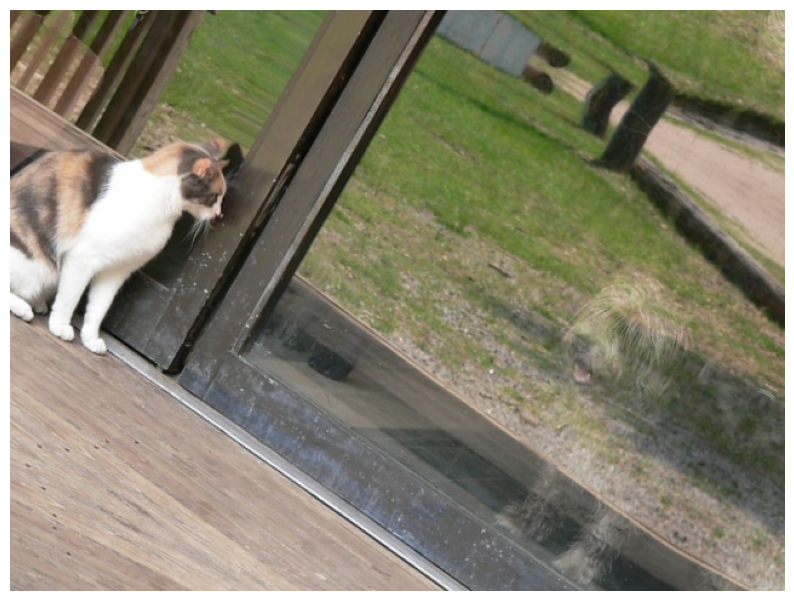

In [12]:
# ShiftScaleRotate
transform = A.ShiftScaleRotate(p=0.4)
random.seed(7)
augmeneted_image = transform(image=image)['image']
visualize(augmeneted_image)

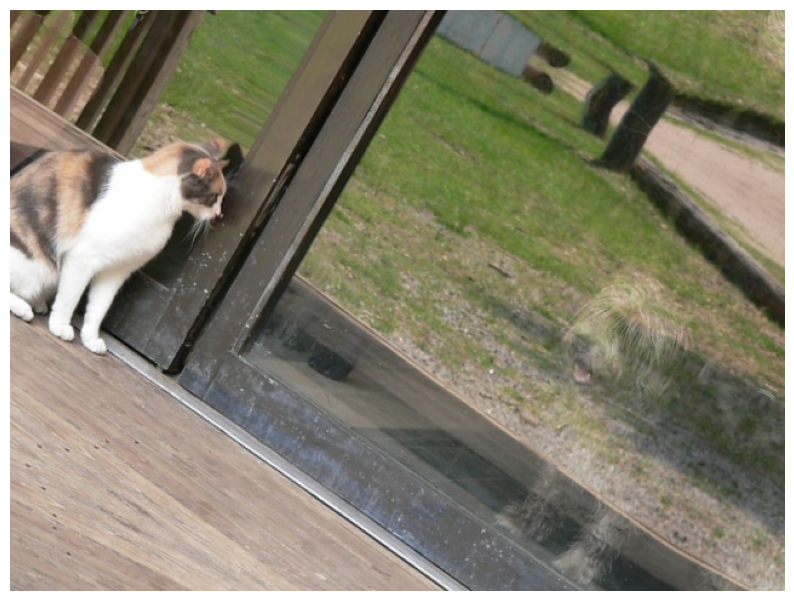

In [14]:
# 복잡한 파이프라인 구축하여 image aug 실행
transform = A.Compose([
    A.CLAHE(), # 색상분포를 바꾸는 기법
    A.RandomRotate90(), # 직각회전
    A.Transpose(), # 단순 병진
    A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.50, rotate_limit=45, p=.75),
    A.Blur(blur_limit=3),
    A.OpticalDistortion(),
    A.GridDistortion(),
    A.HueSaturationValue(),
])
random.seed(42)
augmented_image = transform(image=image)['image']
visualize(augmeneted_image)